# 3ECA
**NAC4**
RM: 74899
Nome: Thalles Machado

In [1]:
#Importando o módulo pandas, e invocando como pd
import pandas as pd
# Visualizar os dados do DataFrame
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Glass Identification Data Set 
**Informações do conjunto de dados:**

Vina conduziu um teste de comparação do seu sistema baseado em regras, BEAGLE, o algoritmo do vizinho mais próximo e análise discriminante. O BEAGLE é um produto disponível através da VRS Consulting, Inc .; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 e FAX: -3189. Ao determinar se o vidro era um tipo de vidro "flutuante" ou não, os seguintes resultados foram obtidos (# respostas incorretas): 

Tipo de Amostra - Beagle - NN - DA 
Windows que foram processados ​​float (87) - 10 - 12 - 21 
Janelas que não eram: (76) - 19 - 16 - 22 

O estudo da classificação dos tipos de vidro foi motivado pela investigação criminológica. Na cena do crime, o vidro deixado pode ser usado como prova ... se for corretamente identificado!


**Informações sobre Atributos:**

1. Número de Identificação: 1 a 214 
2. RI: índice de refração 
3. Na: Sódio (medição unitária: percentual de peso no óxido correspondente, como são os atributos 4-10) 
4. Mg: Magnésio 
5. Al: Alumínio 
6. Si: Silício 
7. K: Potássio 
8. Ca: Cálcio 
9. Ba: Bário 
10. Fe: Ferro 
------------------------------------------
11. Tipo de vidro: (atributo de classe) 
 - 1 building_windows_float_processed 
 - 2 building_windows_non_float_processed 
 - 3 vehicle_windows_float_processed 
 - 4 vehicle_windows_non_float_processed (nenhum em este banco de dados) 
 - 5 recipientes 
 - 6 utensílios de mesa 
 - 7 faróis

In [2]:
#Importando o módulo pandas, e invocando como pd
import pandas as pd

# 1. Carregar o arquivo na variável df

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
header = ['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
            'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro', 'Class_vidro']
df = pd.read_csv(url, header=None, names=header)

In [3]:
df.head(10)

,id,RI_índice_de_refração,Na_Sódio,Mg_Magnésio,Al_Alumínio,Si_Silício,K_Potássio,Ca_Cálcio,Ba_Bário,Fe_Ferro,Class_vidro
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
id                       214 non-null int64
RI_índice_de_refração    214 non-null float64
Na_Sódio                 214 non-null float64
Mg_Magnésio              214 non-null float64
Al_Alumínio              214 non-null float64
Si_Silício               214 non-null float64
K_Potássio               214 non-null float64
Ca_Cálcio                214 non-null float64
Ba_Bário                 214 non-null float64
Fe_Ferro                 214 non-null float64
Class_vidro              214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
# 2.Encontrar um dataframe numérico normalizado
df_norm = df[ ['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro', 'Class_vidro'] ]
# Execução da normalização, onde subtraímos a média (mean) e dividimos
# pelo desvio padrão (standard deviation - std) coluna a coluna
df_norm = (df_norm - df_norm.mean())/df_norm.std()
# Aqui acrescentamos a coluna de espécies
df_norm['Class_vidro'] = df['Class_vidro']

# 3. Separando as amostras de treinamento e validação
frac_validacao = 0.2 # Separamos 20% para a validação

'''
Criando 10 conjuntos
'''
df_valid = []
df_treino = []
from sklearn.utils import shuffle
import math
for i in range(10):

        # Primeiro embaralhamos o dataframe...
        df_shuffle = shuffle(df_norm)
        # ... depois separamos em porção de treinamento e validação
        # Ponto de corte
        icut = math.floor(frac_validacao * df_shuffle.shape[0])
        #Divisão do data frame
        df_valid.append(df_shuffle.iloc[:icut, :])
        df_treino.append(df_shuffle.iloc[icut:, :])
        

In [6]:
print(repr(df_valid))
print(repr(df_treino))

[           id  RI_índice_de_refração  Na_Sódio  Mg_Magnésio  Al_Alumínio  \
16  -1.461548              -0.173014 -0.891314     0.683210    -0.570647   
27  -1.283901              -0.380465 -0.658643     0.551486    -0.230149   
56  -0.815560              -2.046658 -0.511693     0.544553    -0.650764   
42  -1.041656              -0.189479 -0.242285     0.489090    -0.230149   
154  0.767111              -0.469373 -0.670889     0.620814    -0.270208   
185  1.267752              -2.323259  0.345516     0.357366     0.731255   
69  -0.605614               1.526107 -0.119826     0.620814    -1.251641   
115  0.137272               0.031144  0.002632     0.835733    -0.230149   
134  0.444117              -0.084107 -0.095334     0.808001    -0.390383   
23  -1.348500              -0.281679 -0.732118     0.613881    -0.190091   
126  0.314919              -0.558280 -0.572922     0.641613    -0.370354   
32  -1.203153              -0.202650 -0.683135     0.551486    -0.430442   
98  -0.1372

# MLP

Uma das formas mais tradicionais de redes neurais é a MLP, ou Multilayer Perceptron. 
A MLP é um algoritmo de aprendizado supervisionado que aprende uma função que relaciona entradas e saídas através do seu treinamento em um conjunto de dados.

Tipicamente, uma MLP é formada por:
- uma camada de entrada, que corresponde aos M atributos a serem usados para a classificação
- uma camada de saída, que possui um neurônio para cada uma das N classes em que a amostra de atributos será classificada
- uma ou mais camadas ocultas de neurônios, responsáveis por tornar a MLP um classificador não linear



**A instanciação de uma MLP**

Para criarmos uma MLP no `scikit-learn` usamos a classe `MLPClassifier` do pacote `sklearn.neural_network` através do código:
```python
from sklearn.neural_network import MLPClassifier
```
A instanciação de um objeto representando a MLP depende da definição de **hiperparâmetros**, ou seja parâmetros da rede que não serão aprendidos durante a fase de treinamento. Até agora, os hiperparâmetros que aprendemos são:


## Treinamento da MLP

Executar a classificação com MLP através do pacote de Machine Learning mais conhecido do Python, o `scikit-learn'.

 - MLP para realizar a classificação das amostras de teste, com treinamento feito a partir das amostras do treinamento, executando uma normalização dos dados
 - O treinamento variando o número de neurônios da camada oculta em **1x, 2x, 3x e 4x** o número de atributos de
entrada, indicando qual foi o erro de treinamento em cada caso. Para cada rede neural resultante, faça a
classificação dos dados de teste, indicando no código através de comentários quantas amostras de teste
foram classificadas corretamente em cada caso, fazendo a média dos acertos nos **10 conjuntos.**

# Neurônios da camada oculta 1x

In [7]:
from sklearn.neural_network import MLPClassifier
# Definição dos hiperparâmetros
# Função de ativação: pode ser uma dentre: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
activation = 'logistic' 
# Tamanhos das camadas ocultas
hidden_layer_sizes = [10] # Apenas uma camada com quatro neurônios
# Algoritmo de otimização: pode ser um dentre {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
solver = 'sgd' #Stochastic Gradient Descent
# Valor da taxa de aprendizado, default 0.001
learning_rate =  0.03
# Batch size, default é 'auto', ou seja, min(200, n_samples)
batch_size=50
# Número máximo de épocas, default 200
max_iter = 1000
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation, solver=solver,
                    learning_rate_init=learning_rate,
                    batch_size=batch_size,
                    max_iter=max_iter)

In [8]:
# 4. Treinar o classificador MLP instanciado anteriormente, seprando as entradas e saídas 
import numpy as np
erro_medio = np.zeros(10)
for i in range(10):
    entradas = df_treino[i][ ['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro'] ]
    saidas = df_treino[i]['Class_vidro']
    mlp.fit(entradas, saidas)
    # 5. Executar o classificador nas amostras de validação
    entradas_valid = df_valid[i][['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro']]
    classes = mlp.predict(entradas_valid)

    #Cálculo do erro
    # Conta quantas amostras foram classificadas de modo errado
    erro_total = np.sum(classes != df_valid[i]['Class_vidro'])
    # Encontra o ero médio por amostra
    erro_medio[i] = erro_total/df_valid[i].shape[0]
    
print("Erro médio de classificação: ", erro_medio.mean() )


Erro médio de classificação:  0.09047619047619046


# _Neurônios da camada oculta 2x

In [9]:
from sklearn.neural_network import MLPClassifier
# Definição dos hiperparâmetros
# Função de ativação: pode ser uma dentre: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
activation = 'logistic' 
# Tamanhos das camadas ocultas
hidden_layer_sizes = [20] # Apenas uma camada com quatro neurônios
# Algoritmo de otimização: pode ser um dentre {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
solver = 'sgd' #Stochastic Gradient Descent
# Valor da taxa de aprendizado, default 0.001
learning_rate =  0.03
# Batch size, default é 'auto', ou seja, min(200, n_samples)
batch_size=50
# Número máximo de épocas, default 200
max_iter = 1000
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation, solver=solver,
                    learning_rate_init=learning_rate,
                    batch_size=batch_size,
                    max_iter=max_iter)

In [10]:
# 4. Treinar o classificador MLP instanciado anteriormente, seprando as entradas e saídas 
import numpy as np
erro_medio = np.zeros(10)
for i in range(10):
    entradas = df_treino[i][ ['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro'] ]
    saidas = df_treino[i]['Class_vidro']
    mlp.fit(entradas, saidas)
    # 5. Executar o classificador nas amostras de validação
    entradas_valid = df_valid[i][['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro']]
    classes = mlp.predict(entradas_valid)

    #Cálculo do erro
    # Conta quantas amostras foram classificadas de modo errado
    erro_total = np.sum(classes != df_valid[i]['Class_vidro'])
    # Encontra o ero médio por amostra
    erro_medio[i] = erro_total/df_valid[i].shape[0]
    
print("Erro médio de classificação: ", erro_medio.mean() )


Erro médio de classificação:  0.06666666666666667


# _Neurônios da camada oculta 3x

In [11]:
from sklearn.neural_network import MLPClassifier
# Definição dos hiperparâmetros
# Função de ativação: pode ser uma dentre: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
activation = 'logistic' 
# Tamanhos das camadas ocultas
hidden_layer_sizes = [30] # Apenas uma camada com quatro neurônios
# Algoritmo de otimização: pode ser um dentre {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
solver = 'sgd' #Stochastic Gradient Descent
# Valor da taxa de aprendizado, default 0.001
learning_rate =  0.03
# Batch size, default é 'auto', ou seja, min(200, n_samples)
batch_size=50
# Número máximo de épocas, default 200
max_iter = 1000
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation, solver=solver,
                    learning_rate_init=learning_rate,
                    batch_size=batch_size,
                    max_iter=max_iter)

In [12]:
# 4. Treinar o classificador MLP instanciado anteriormente, seprando as entradas e saídas 
import numpy as np
erro_medio = np.zeros(10)
for i in range(10):
    entradas = df_treino[i][ ['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro'] ]
    saidas = df_treino[i]['Class_vidro']
    mlp.fit(entradas, saidas)
    # 5. Executar o classificador nas amostras de validação
    entradas_valid = df_valid[i][['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro']]
    classes = mlp.predict(entradas_valid)

    #Cálculo do erro
    # Conta quantas amostras foram classificadas de modo errado
    erro_total = np.sum(classes != df_valid[i]['Class_vidro'])
    # Encontra o ero médio por amostra
    erro_medio[i] = erro_total/df_valid[i].shape[0]
    
print("Erro médio de classificação: ", erro_medio.mean() )


Erro médio de classificação:  0.0738095238095238


# _Neurônios da camada oculta 4x

In [13]:
from sklearn.neural_network import MLPClassifier
# Definição dos hiperparâmetros
# Função de ativação: pode ser uma dentre: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
activation = 'logistic' 
# Tamanhos das camadas ocultas
hidden_layer_sizes = [40] # Apenas uma camada com quatro neurônios
# Algoritmo de otimização: pode ser um dentre {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
solver = 'sgd' #Stochastic Gradient Descent
# Valor da taxa de aprendizado, default 0.001
learning_rate =  0.03
# Batch size, default é 'auto', ou seja, min(200, n_samples)
batch_size=50
# Número máximo de épocas, default 200
max_iter = 1000
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation, solver=solver,
                    learning_rate_init=learning_rate,
                    batch_size=batch_size,
                    max_iter=max_iter)

In [14]:
# 4. Treinar o classificador MLP instanciado anteriormente, seprando as entradas e saídas 
import numpy as np
erro_medio = np.zeros(10)
for i in range(10):
    entradas = df_treino[i][ ['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro'] ]
    saidas = df_treino[i]['Class_vidro']
    mlp.fit(entradas, saidas)
    # 5. Executar o classificador nas amostras de validação
    entradas_valid = df_valid[i][['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
                'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro']]
    classes = mlp.predict(entradas_valid)

    #Cálculo do erro
    # Conta quantas amostras foram classificadas de modo errado
    erro_total = np.sum(classes != df_valid[i]['Class_vidro'])
    # Encontra o ero médio por amostra
    erro_medio[i] = erro_total/df_valid[i].shape[0]
    
print("Erro médio de classificação: ", erro_medio.mean() )


Erro médio de classificação:  0.06666666666666665


**-->>Fim da Parte do MLP <<--** 

# KNN

In [15]:
#Importando o módulo pandas, e invocando como pd
import pandas as pd

# 1. Carregar o arquivo na variável df

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
header = ['id', 'RI_índice_de_refração', 'Na_Sódio', 'Mg_Magnésio', 'Al_Alumínio', 'Si_Silício',
            'K_Potássio', 'Ca_Cálcio', 'Ba_Bário', 'Fe_Ferro', 'Class_vidro']
df = pd.read_csv(url, header=None, names=header)

In [16]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
id                       214 non-null int64
RI_índice_de_refração    214 non-null float64
Na_Sódio                 214 non-null float64
Mg_Magnésio              214 non-null float64
Al_Alumínio              214 non-null float64
Si_Silício               214 non-null float64
K_Potássio               214 non-null float64
Ca_Cálcio                214 non-null float64
Ba_Bário                 214 non-null float64
Fe_Ferro                 214 non-null float64
Class_vidro              214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


,id,RI_índice_de_refração,Na_Sódio,Mg_Magnésio,Al_Alumínio,Si_Silício,K_Potássio,Ca_Cálcio,Ba_Bário,Fe_Ferro,Class_vidro
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# Análise exploratória de dados

_Usei seaborn no DataFrame para criar um pairplot com indicada pela coluna 'Class_vidro'

/home/tls/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/tls/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/tls/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/tls/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


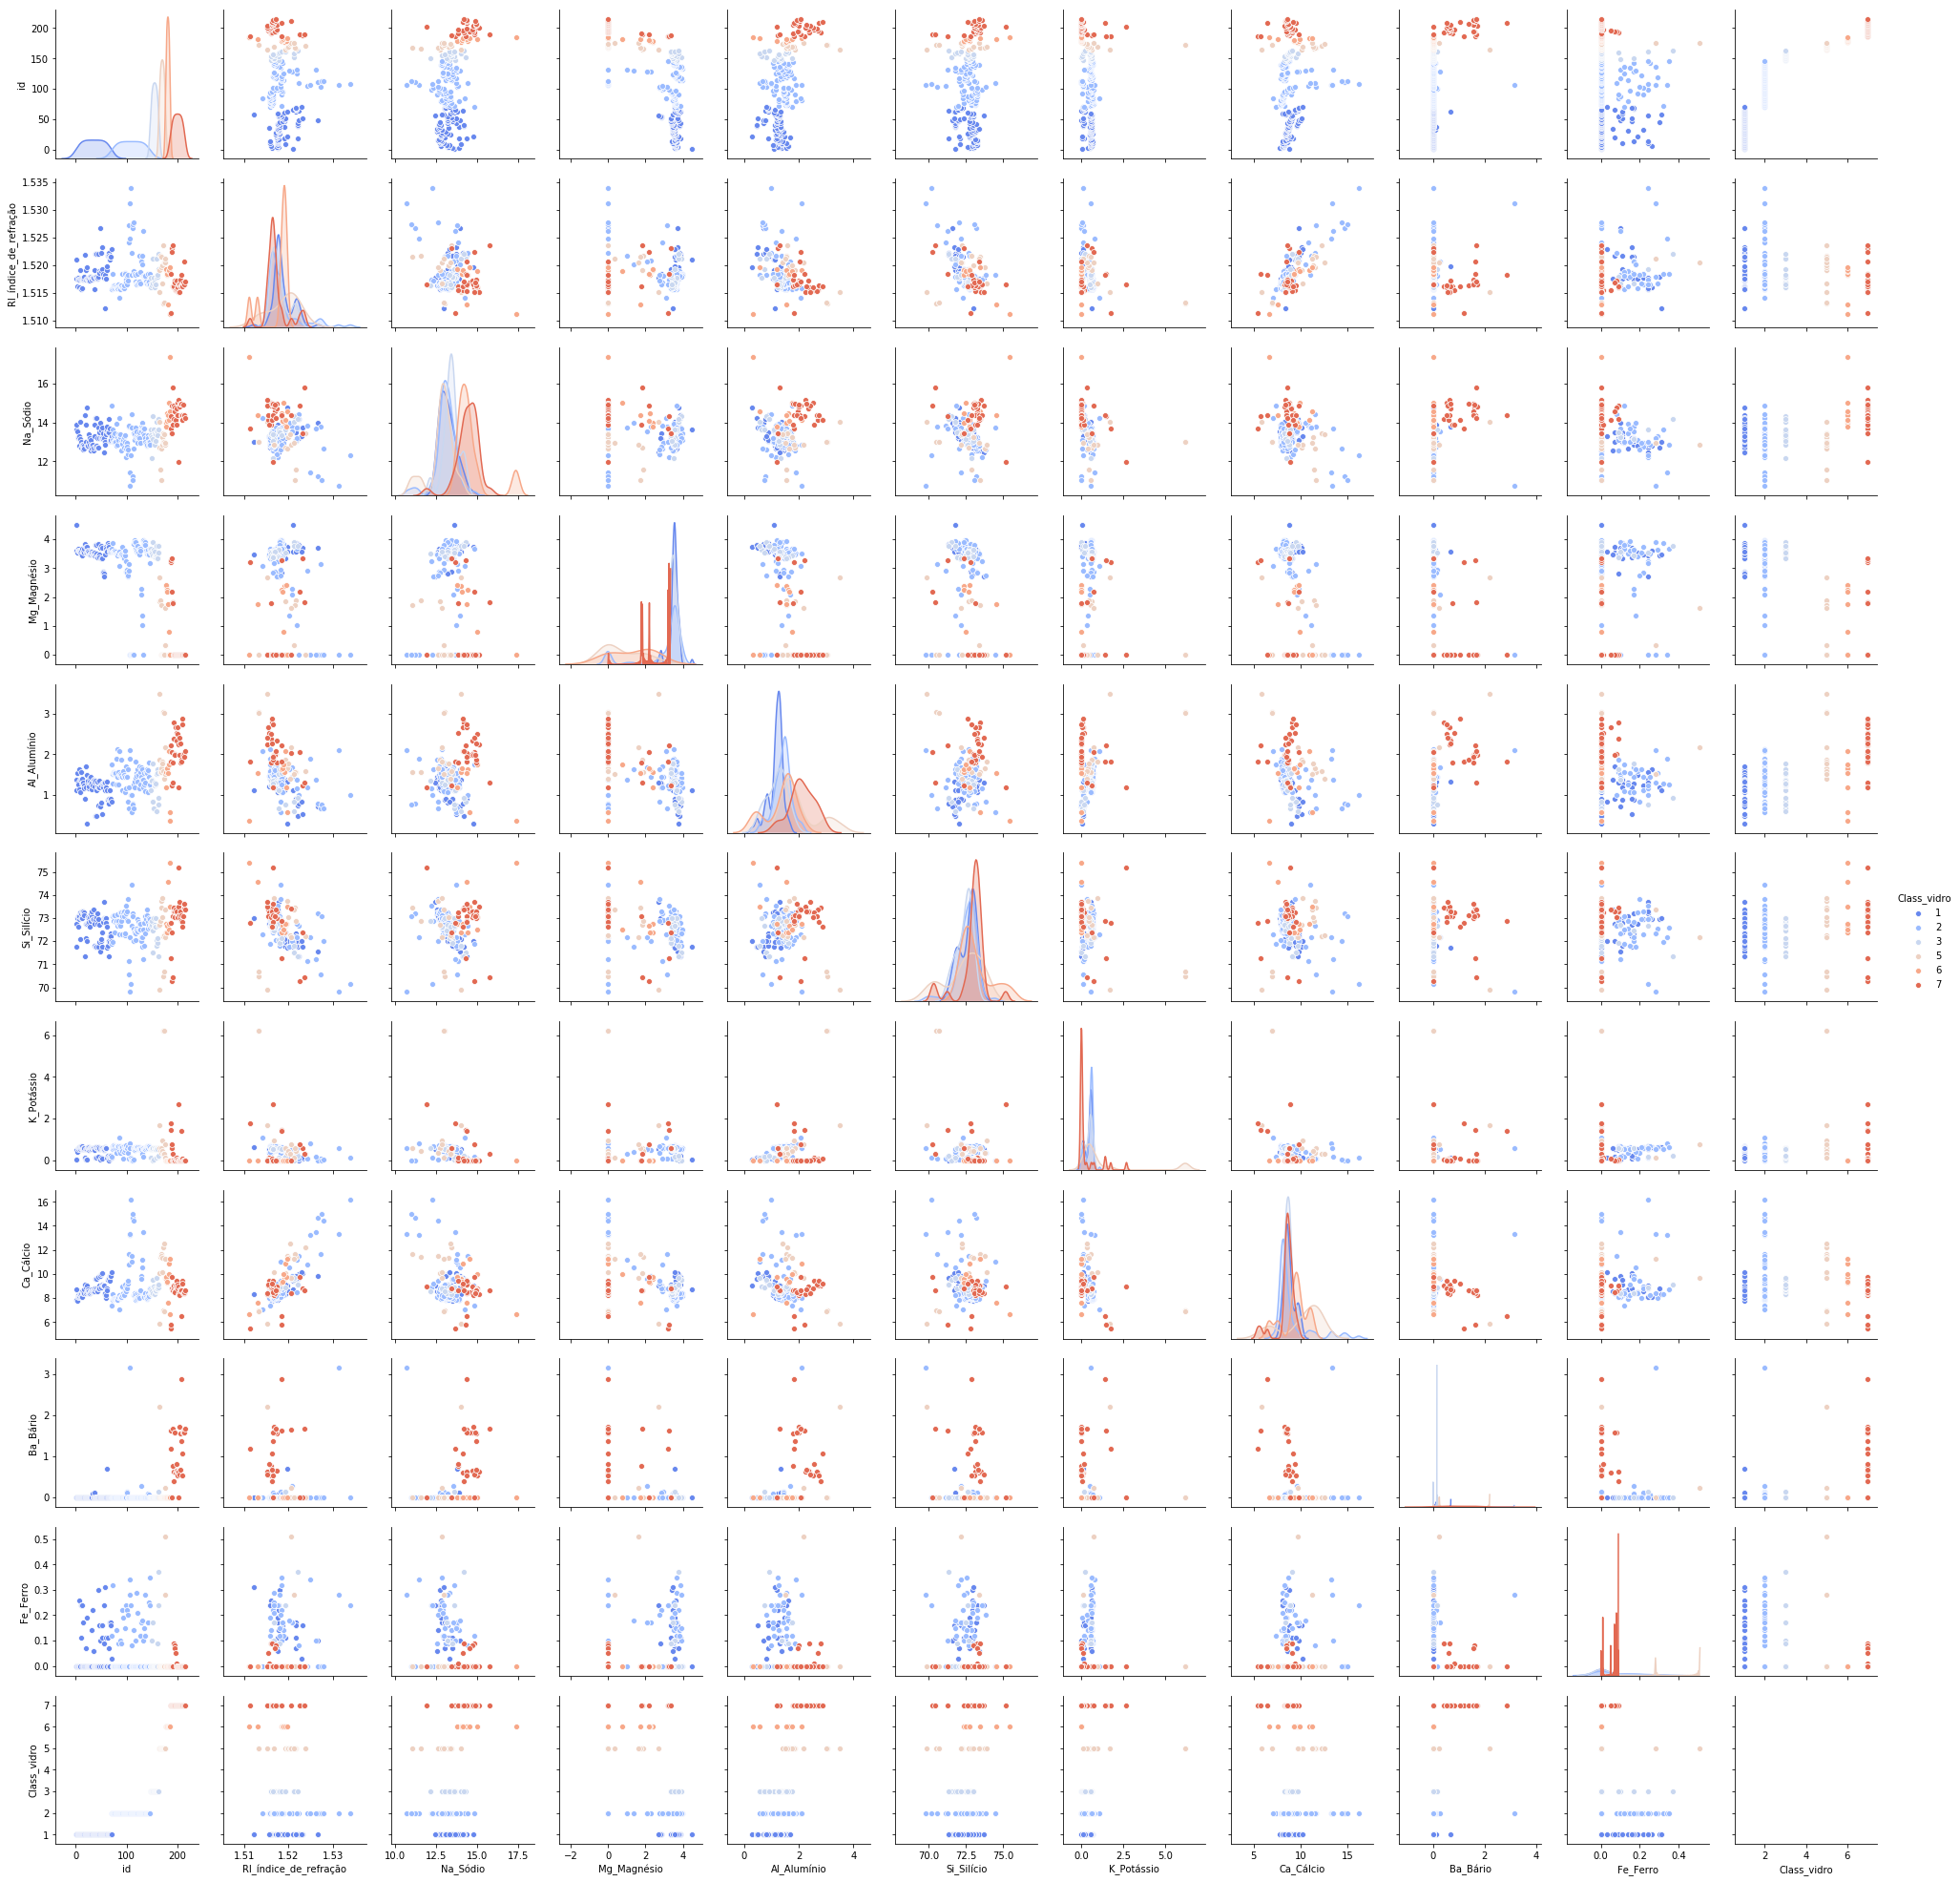

In [17]:
sns.pairplot(df, hue='Class_vidro', palette='coolwarm')

In [ ]:
# outro modelo visualização
#  sns.pairplot(df, hue='Class_vidro', palette='Dark2')

# Padronize as variáveis

 - Padronizar as variáveis.

**Import StandardScaler do Scikit-learn**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#  Crie um objeto StandardScaler() chamado scaler.
scaler = StandardScaler()

In [20]:
# Usei o método fit() do objeto para treinar o modelo.
scaler.fit(df.drop('Class_vidro',axis=1))

/home/tls/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
# O método .transform () para transformar os parâmetros em uma versão padronizada.
scaled_features = scaler.transform(df.drop('Class_vidro',axis=1))

/home/tls/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [22]:
'''
Converta os parâmetros padronizados em um DataFrame e verifique
    o cabeçalho desse DataFrame para garantir que a transform()
'''
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head(10)

,id,RI_índice_de_refração,Na_Sódio,Mg_Magnésio,Al_Alumínio,Si_Silício,K_Potássio,Ca_Cálcio,Ba_Bário,Fe_Ferro
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
5,-1.643038,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150
6,-1.626851,-0.308744,-0.132382,0.636168,-0.612137,0.568197,0.127475,-0.554268,-0.352877,-0.586451
7,-1.610663,-0.265836,-0.316500,0.643117,-0.792823,0.762313,0.112107,-0.504966,-0.352877,-0.586451
8,-1.594475,0.268859,0.775936,0.622270,-0.150384,-0.738850,0.096738,-0.462707,-0.352877,-0.586451
9,-1.578288,-0.269137,-0.500618,0.636168,-0.170460,0.438787,0.112107,-0.392276,-0.352877,0.545111


**Divisão treino-teste**

O método train_test_split para dividir seus dados em um conjunto treino e teste.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class_vidro'],
                                                    test_size=0.30)

**-->> Usando o KNN**

Importe o KNeighborClassifier do scikit learn.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Uma instância do modelo KNN com n_neighbors = 1

knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
# Ajuste este modelo KNN aos dados de treinamento.

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [36]:
# Previsões e avaliações o nosso modelo KNN!
#  Método de previsão para prever valores usando seu modelo KNN e X_test.

pred = knn.predict(X_test)

In [37]:
# Uma matriz de confusão e um relatório de classificação.
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))


[[20  0  0  0  0  0]
 [ 4 21  0  1  1  0]
 [ 2  2  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  7]]


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        20
           2       0.88      0.78      0.82        27
           3       1.00      0.33      0.50         6
           5       0.67      0.67      0.67         3
           6       0.33      1.00      0.50         1
           7       1.00      0.88      0.93         8

   micro avg       0.82      0.82      0.82        65
   macro avg       0.77      0.78      0.72        65
weighted avg       0.85      0.82      0.81        65



**Escolhendo o valor K**

Um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista.

In [39]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

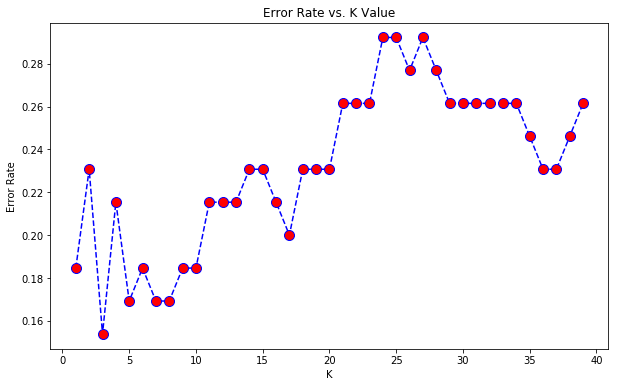

In [40]:
#  Agora o seguinte gráfico usando as informações do seu loop.

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**--->> Treino do teste para k=3, 5 e 9.**

In [41]:
## Treino o modelo novamente com novo valor K

# WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[20  0  0  0  0  0]
 [ 3 22  0  1  1  0]
 [ 2  1  3  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  7]]


              precision    recall  f1-score   support

           1       0.80      1.00      0.89        20
           2       0.92      0.81      0.86        27
           3       1.00      0.50      0.67         6
           5       0.67      0.67      0.67         3
           6       0.33      1.00      0.50         1
           7       1.00      0.88      0.93         8

   micro avg       0.85      0.85      0.85        65
   macro avg       0.79      0.81      0.75        65
weighted avg       0.88      0.85      0.85        65



In [42]:
## Treino o modelo novamente com novo valor K

# WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[20  0  0  0  0  0]
 [ 2 24  0  1  0  0]
 [ 2  3  1  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        20
           2       0.80      0.89      0.84        27
           3       1.00      0.17      0.29         6
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         1
           7       1.00      0.88      0.93         8

   micro avg       0.83      0.83      0.83        65
   macro avg       0.86      0.71      0.73        65
weighted avg       0.84      0.83      0.80        65



In [43]:
## Treino o modelo novamente com novo valor K

# WITH K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=9


[[20  0  0  0  0  0]
 [ 2 24  0  1  0  0]
 [ 2  4  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        20
           2       0.77      0.89      0.83        27
           3       0.00      0.00      0.00         6
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         1
           7       1.00      0.88      0.93         8

   micro avg       0.82      0.82      0.82        65
   macro avg       0.68      0.68      0.68        65
weighted avg       0.74      0.82      0.77        65



/home/tls/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tls/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tls/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**--Fim--**